# Composition Analyses Suite

In [1]:
import os
import numpy as np
import pandas as pd
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import CompositionAnalysesSuite
from neuro_dmt.models.bluebrain.circuit.atlas import\
    BlueBrainCircuitAtlas
from neuro_dmt.models.bluebrain.circuit.model import\
    BlueBrainCircuitModel,\
    CircuitProvenance
from neuro_dmt.models.bluebrain.circuit.adapter import\
    BlueBrainCircuitAdapter

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mtype', 'etype', 'synapse_class')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi')


We will be using SSCx dissemination circuits. We set up paths and load the 
biological mean circuit (over 7 rats).

In [2]:
project =\
    os.path.join(
        "/gpfs/bbp.cscs.ch/project")
proj_sscx_diss=\
    os.path.join(
        project,
        "proj83")
data_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "data")
atlases_sscx_diss=\
    os.path.join(
        data_sscx_diss,
        "atlas/S1/MEAN")
circuits_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "circuits")
atlas_bio_m =\
    BlueBrainCircuitAtlas(
        path=os.path.join(
                atlases_sscx_diss, "P14-MEAN"))
path_bio_m =\
    os.path.join(
        circuits_sscx_diss,
        "Bio_M/20191206")
circuit_bio_m =\
    BlueBrainCircuitModel(
        path_circuit_data=path_bio_m,
            provenance=CircuitProvenance(
                label="SSCxRatDisseminationBioM",
                authors=["BBP Team"],
                release_date="20191212",
                uri=path_bio_m,
                animal="Wistar Rat",
                age="P14",
                brain_region="SSCx"))
adapter =\
    BlueBrainCircuitAdapter()

In [ ]:
from neuro_dmt.models.bluebrain.circuit.mock.circuit import\
    MockCircuit, MockBlueBrainCircuitModel
from neuro_dmt.models.bluebrain.circuit.mock.test.mock_circuit_light import\
    circuit_composition,\
    circuit_connectivity

mock_circuit_model =\
    MockBlueBrainCircuitModel(
        circuit_composition, 
        circuit_connectivity,
        label="BlueBrainCircuitModelMockLight")

In [12]:
suite_composition_analyses =\
    CompositionAnalysesSuite(
        sample_size=100,
        size_roi=50.*np.ones(1),
        bin_size_cortical_thickness=25.)

In [8]:
cell_density_measurement =\
    suite_composition_analyses\
        .analysis_cell_density_by_depth_using_sampling\
        .get_measurement(
            circuit_bio_m,
            adapter,
            sample_size=1)
print(cell_density_measurement["data"].shape)
cell_density_measurement["data"].head()

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 0.0, 'end': 100.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (15845, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 100.0, 'end': 200.0}}.
           

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (10624, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 900.0, 'end': 1000.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (10405, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-pac

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (8100, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 1800.0, 'end': 1900.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (8009, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-pack

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (1304, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 100.0, 'end': 200.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (1065, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packag

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (843, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 1000.0, 'end': 1100.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (825, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packag

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (601, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 1900.0, 'end': 2000.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (174, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packag

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (6069, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 200.0, 'end': 300.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (5735, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packag

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (5160, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 1100.0, 'end': 1200.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (5022, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-pack

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (1784, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 2000.0, 'end': 2100.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (301, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packa

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (2792, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 300.0, 'end': 400.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (2941, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packag

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (2544, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 1200.0, 'end': 1300.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (2490, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-pack

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 2100.0, 'end': 2200.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro

cell_density
dataset               region (depth, begin) (depth, end)              
BlueBrainCircuitModel S1FL   0.0            100.0               8000.0
                             100.0          200.0               8000.0
                             200.0          300.0             112000.0
                             300.0          400.0              88000.0
                             400.0          500.0              88000.0

In [10]:
cell_density_measurement["data"].head()

cell_density
dataset               region (depth, begin) (depth, end)              
BlueBrainCircuitModel S1FL   0.0            100.0               8000.0
                             100.0          200.0               8000.0
                             200.0          300.0             112000.0
                             300.0          400.0              88000.0
                             400.0          500.0              88000.0

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 0.0, 'end': 25.0}}.
                



/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/atlas/principal_axis.py:141: RuntimeWarning: invalid value encountered in greater_equal
  return np.logical_and(begin <= values, values < end)
/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/atlas/principal_axis.py:141: RuntimeWarning: invalid value encountered in less
  return np.logical_and(begin <= values, values < end)


/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (4402, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 25.0, 'end': 50.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (4480, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 225.0, 'end': 250.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (3142, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 250.0, 'end': 275.0}}.
          

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (2954, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 450.0, 'end': 475.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (2932, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packag

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 650.0, 'end': 675.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (2743, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 675.0, 'end': 700.0}}.
          

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (2684, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 875.0, 'end': 900.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (2623, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packag

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 1075.0, 'end': 1100.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (2476, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 1100.0, 'end': 1125.0}}.
      

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (2355, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 1300.0, 'end': 1325.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (2313, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-pack

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 1500.0, 'end': 1525.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (2209, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 1525.0, 'end': 1550.0}}.
      

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (2064, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 1725.0, 'end': 1750.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (2041, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-pack

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 1925.0, 'end': 1950.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (2082, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 1950.0, 'end': 1975.0}}.
      

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (20, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 2150.0, 'end': 2175.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/ne

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 2375.0, 'end': 2400.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 50.0, 'end': 75.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (277, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 75.0, 'end': 100.0}}.
              

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (258, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 275.0, 'end': 300.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (242, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 475.0, 'end': 500.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (241, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 500.0, 'end': 525.0}}.
           

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (224, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 700.0, 'end': 725.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (231, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 900.0, 'end': 925.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (212, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 925.0, 'end': 950.0}}.
           

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (212, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 1125.0, 'end': 1150.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (197, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packag

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 1325.0, 'end': 1350.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (192, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 1350.0, 'end': 1375.0}}.
       

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (199, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 1550.0, 'end': 1575.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (170, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packag

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 1750.0, 'end': 1775.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (175, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 1775.0, 'end': 1800.0}}.
       

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (29, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 1975.0, 'end': 2000.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (8, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 2200.0, 'end': 2225.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 2425.0, 'end': 2450.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 100.0, 'end': 125.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (1573, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 125.0, 'end': 150.0}}.
          

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (1471, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 325.0, 'end': 350.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (1393, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packag

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 525.0, 'end': 550.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (1386, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 550.0, 'end': 575.0}}.
          

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (1376, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 750.0, 'end': 775.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (1346, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packag

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 950.0, 'end': 975.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (1309, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 975.0, 'end': 1000.0}}.
         

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (1270, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 1175.0, 'end': 1200.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (1241, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-pack

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 1375.0, 'end': 1400.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (1214, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 1400.0, 'end': 1425.0}}.
      

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (1241, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 1600.0, 'end': 1625.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (1213, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-pack

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 1800.0, 'end': 1825.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (1108, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 1825.0, 'end': 1850.0}}.
      

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (182, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 2025.0, 'end': 2050.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (101, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packag

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 2250.0, 'end': 2275.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 2475.0, 'end': 2500.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 150.0, 'end': 175.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (764, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 175.0, 'end': 200.0}}.
           

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (750, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 375.0, 'end': 400.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (752, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 575.0, 'end': 600.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (761, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 600.0, 'end': 625.0}}.
           

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (726, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 800.0, 'end': 825.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (698, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 1000.0, 'end': 1025.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (678, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 1025.0, 'end': 1050.0}}.
       

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (645, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 1225.0, 'end': 1250.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (609, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packag

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 1425.0, 'end': 1450.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (861, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 1450.0, 'end': 1475.0}}.
       

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (246, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 1650.0, 'end': 1675.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (219, 3)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packag

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 1850.0, 'end': 1875.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 1875.0, 'end': 1900.0}}.
           

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 2075.0, 'end': 2100.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 2300.0, 'end': 2325.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-01-31 10:52:48>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            



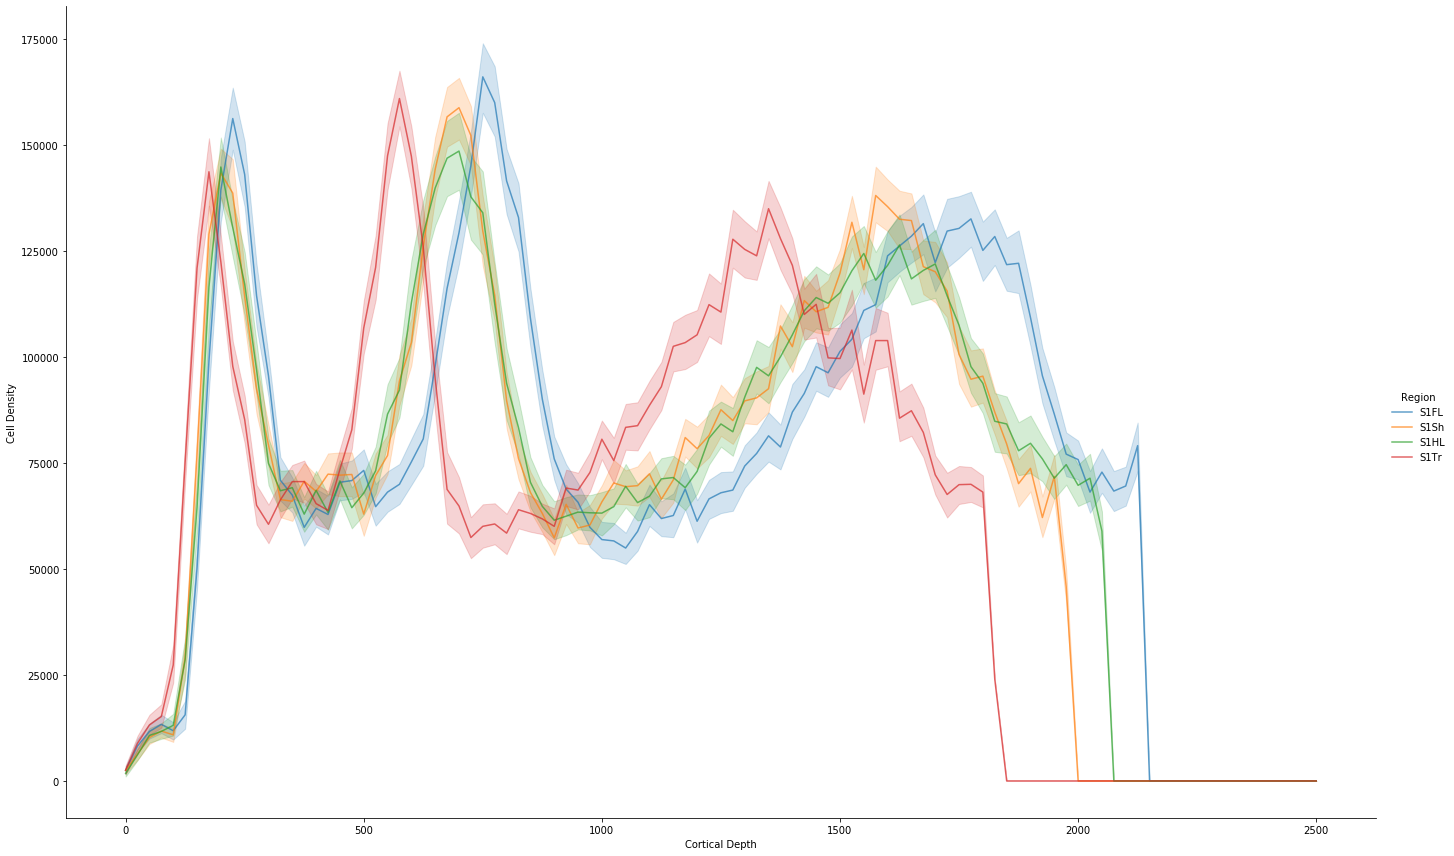

In [14]:
cell_density_report =\
    suite_composition_analyses\
        .analysis_cell_density_by_depth_using_sampling(
            circuit_bio_m,
            adapter,
            sample_size=100)

In [ ]:
suite_composition_analyses\
    .measurement_cell_density_using_sampling(
        mock_circuit_model,
        adapter,
        **parameters[100])

In [ ]:
d = pd.DataFrame({"xs": range(10), "ys": range(11, 21)})
d.reindex([11, 12]).dropna().shape[0]

In [ ]:
from neuro_dmt.models.bluebrain.circuit.geometry import Cuboid
mock_circuit_model\
    ._get_bluepy_cell_query(
        **mock_circuit_model._resolve_query_region(
            depth=100,
            layer="L2",
            roi=Cuboid(np.zeros(3), np.ones(3))))

In [ ]:
mock_circuit_model\
    .get_cells(depth=100)\
    .head()

In [ ]:
composition_analyses\
    .analysis_mtype_cell_density_by_layer_exhaustively(
        circuit_bio_m,
        adapter)

In [ ]:
composition_analyses.measurement_mtype_cell_density_exhaustively(
    circuit_bio_m,
    adapter,
    layer="L1",
    region="S1HL")

In [ ]:
cell_counts =\
    cells.groupby(
        ["region", "layer", "mtype"]
    ).agg(
        "size"
    )
cell_counts.xs(
    ("S1HL", 1),
    level=("region", "layer"))

In [ ]:
cell_counts.xs(
    ("S1FL", 2), level=("region", "layer")
)/cell_counts.xs(
    ("S1HL", 2), level=("region", "layer")
)

In [ ]:
cell_counts.xs(
    ("S1HL", 2), level=("region", "layer"))

In [ ]:
from neuro_dmt.analysis.reporting import CheetahReporter
from neuro_dmt import terminology

cd_rd =\
    composition_analysis.reference_data_cell_density(
                                adapter.get_brain_regions(circuit_bio_m))
cd_measurement =\
    composition_analysis\
        .analysis_cell_density_by_layer_using_sampling\
        .get_measurement(
            circuit_bio_m,
            adapter,
            reference_data=cd_rd,
            sampling_methodology=terminology.sampling_methodology.random,
            sample_size=2)
            
cd_report =\
    composition_analysis\
        .analysis_cell_density_by_layer_using_sampling\
        .get_report(
            cd_measurement,
            reference_data=cd_rd,
            figures={},
            **adapter.get_provenance(circuit_bio_m))


In [ ]:
from neuro_dmt import terminology
inh_fraction_report =\
    composition_analysis\
        .analysis_inihibitory_cell_fraction_by_layer_overall(
            circuit_bio_m,
            adapter,
            sampling_methodology=terminology.sampling_methodology.exhaustive)

In [ ]:
inh_fraction_report.measurement

In [ ]:
print(rat.defelipe2017.data.shape)
rat.defelipe2017.data.groupby("layer").agg(["size", "mean", "std"])

In [ ]:
defelipe_2017 =\
    data_plotting[
        data_plotting.dataset == "DeFelipe2017"]
print(defelipe_2017.shape[0])
defelipe_2017\
    .groupby("layer")\
    .agg(["mean", "std"])

In [ ]:
seaborn.barplot(
    x="layer",
    y="cell_density",
    hue="dataset",
    ci="sd",
    data=data_plotting[data_plotting.region == "S1HL"]
).set(
    xlabel="Layer",
    ylabel="Cell Density")

In [ ]:
seaborn.catplot(
    kind="bar",
    x="layer",
    y="cell_density",
    hue="dataset",
    ci="sd",
    data=data_plotting[data_plotting.region == "S1HL"]
)

In [ ]:
import seaborn
data =\
    cd_report.measurement\
        .groupby(["layer", "region"])\
        .agg(["mean", "std"])\
        .reset_index()
data.head()
seaborn.barplot(
    x="layer",
    y=("cell_density", "mean"),
    hue="region",
    data=data)

In [ ]:
overall_cd_m =\
    cell_density_analysis\
        .get_measurement(
            circuit_bio_m,
            adapter,
            sampling_methodology=terminology.sampling_methodology.exhaustive)

In [ ]:
overall_cd_m

In [ ]:
from neuro_dmt import terminology
overall_cd =\
    cell_density_analysis(
        circuit_bio_m,
        adapter,
        sampling_methodology=terminology.sampling_methodology.exhaustive)

In [ ]:
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import *
bars = Bars(
    xvar="layer",
    xlabel="Layer",
    yvar="cell_density",
    ylabel="Cell Density",
    gvar="dataset")

In [ ]:
cell_density_measurement =\
    cell_density_analysis\
        .get_measurement(
            circuit_bio_m,
            adapter)

In [ ]:
cell_density_analysis.get_figures(
    cell_density_analysis._with_reference_data(
        cell_density_measurement["data"]))

In [ ]:
cdard =\
    cell_density_analysis\
        ._with_reference_data(
            cell_density_measurement["data"])

In [ ]:
cdard["DeFelipe2014"]

In [ ]:
from dmt.data.observation import measurement
measurement.concat_as_samples(
    cell_density_analysis._with_reference_data(
        cell_density_measurement["data"]))

In [ ]:
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import *

cell_density_analysis =\
    BrainCircuitAnalysis(
        phenomenon=composition_analysis.phenomenon_cell_density,
        AdapterInterface=composition_analysis.AdapterInterface,
        reference_data=composition_analysis.sampled_reference_data(
            composition_analysis.reference_data_cell_density),
        measurement_parameters=composition_analysis.parameters_regions_and_layers,
        sample_measurement=composition_analysis.sample_measurement_cell_density,
        plotter=MultiPlot(
            mvar="region",
            plotter=Bars(
                xvar="layer",
                xlabel="Layer",
                yvar="cell_density",
                ylabel="Cell Density",
                gvar="dataset")),
        report=CircuitAnalysisReport)

In [ ]:
cell_density_analysis(circuit_bio_m, adapter)

In [ ]:
parameter_values =\
    cell_density_analysis\
        .measurement_parameters


In [ ]:
parameter_values

In [ ]:
class Test:
    def __init__(self,value):
        if not isinstance(value, Test):
            self.value = value
        else:
            self.value = value.value
            

In [ ]:
test = Test(10)
test_2 = Test(test)

In [ ]:
test_2 == test

In [ ]:
import pandas as pd
from dmt.tk.parameters import Parameters

regions = ["S1HL", "S1FL"]
layers = range(1,7)
regions_and_layers =\
    pd.DataFrame({
        "region": [r for r in regions for _ in layers],
        "layer": [l for _ in regions for l in layers]})
p0 = Parameters(regions_and_layers)
p1 = Parameters(p0)

In [ ]:
p1.values

In [ ]:
(43345060) ** (1./3.)

In [ ]:
regions_and_layers =\
    composition_analysis\
        .parameters_regions_and_layers

In [ ]:
regions_and_layers._resolve_values(adapter, circuit_bio_m)